In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#check path 
data = pd.read_csv("measurements/normalized/NL10131_2012_2021.csv")

data["Datetime"] = pd.to_datetime(data["Datetime"])
#copy to create a new data frame separate from the input values
df = data.copy()

#optional set Datetime as index
#df.set_index("Datetime", inplace=True)
#show index
#df.index

#show first 5 rows
data.head()

,Datetime,NH3,Lat,Lon,Station
0,2012-01-01 04:00:00,0.105955,51.54052,5.85307,NL10131
1,2012-01-01 05:00:00,0.119305,51.54052,5.85307,NL10131
2,2012-01-01 06:00:00,0.119305,51.54052,5.85307,NL10131
3,2012-01-01 07:00:00,0.119305,51.54052,5.85307,NL10131
4,2012-01-01 08:00:00,0.119305,51.54052,5.85307,NL10131


In [41]:
#append the day of the week to each data point (row)
def add_weekday_column(df, date_column):
    df['weekday'] = df[date_column].dt.day_name()
    return df

df_weekdays_2012_2021 = add_weekday_column(df, 'Datetime')
df_weekdays_2012_2021.head(5)

,Datetime,NH3,Lat,Lon,Station,weekday
0,2012-01-01 04:00:00,0.105955,51.54052,5.85307,NL10131,Sunday
1,2012-01-01 05:00:00,0.119305,51.54052,5.85307,NL10131,Sunday
2,2012-01-01 06:00:00,0.119305,51.54052,5.85307,NL10131,Sunday
3,2012-01-01 07:00:00,0.119305,51.54052,5.85307,NL10131,Sunday
4,2012-01-01 08:00:00,0.119305,51.54052,5.85307,NL10131,Sunday


In [42]:
#range of dates compatible with datetime format. 
start_date, end_date =  '2020-02-15', '2020-08-31'
date_range = pd.date_range(start=start_date, end=end_date)

df_subset = df_weekdays_2012_2021[df_weekdays_2012_2021['Datetime'].isin(date_range)]
df_subset.head(5)

,Datetime,NH3,Lat,Lon,Station,weekday
70017,2020-02-15,0.264524,51.54052,5.85307,NL10131,Saturday
70041,2020-02-16,0.070117,51.54052,5.85307,NL10131,Sunday
70065,2020-02-17,0.033467,51.54052,5.85307,NL10131,Monday
70089,2020-02-18,0.046838,51.54052,5.85307,NL10131,Tuesday
70113,2020-02-19,0.058350,51.54052,5.85307,NL10131,Wednesday


C:\Users\cedri\AppData\Local\Temp\ipykernel_15896\94581184.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


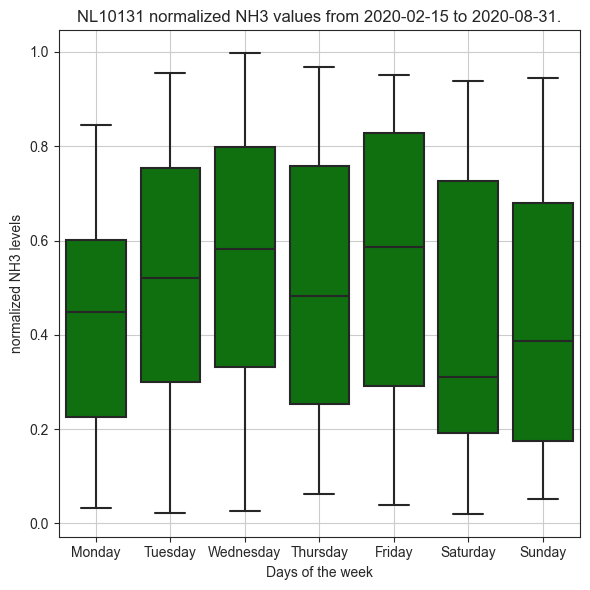

In [43]:
#create boxplot based on date_range form previous cell.
f = plt.figure(figsize=(6,6))
sns.set_style('ticks')
ax = sns.boxplot(x='weekday', y='NH3', data=df_subset[["NH3", "weekday"]], color='g', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax.grid()
#ax.axhline(0.1)
ax.set(xlabel='Days of the week', ylabel='normalized NH3 levels', title='NL10131 normalized NH3 values from '
       +str(start_date)+" to "+str(end_date)+".")
f.tight_layout()
f.savefig(f"output/boxplotNH3_" + str(start_date)+"_"+str(end_date)+".png", dpi=300)
f.show()

In [44]:
""" 
    TODO
    Used the above code to do the following: 
    Create weekday based box-plots for each year, one for the manure (red) and non-manure season (blue). 
    Make sure the title reflects the period and station name
    Do this separately for the 6 stations (or which ever stations are of interested)
"""

' \n    TODO\n    Used the above code to do the following: \n    Create weekday based box-plots for each year, one for the manure (red) and non-manure season (blue). \n    Make sure the title reflects the period and station name\n    Do this separately for the 6 stations (or which ever stations are of interested)\n'

In [74]:
#MAN TEST
from scipy.stats import mannwhitneyu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

df = pd.read_csv('measurements/normalized/NL10633_2012_2021.csv', parse_dates=[0])
df.head(5)

,Datetime,NH3,Lat,Lon,Station
0,2012-01-01 04:00:00,0.053328,52.13795,4.83819,NL10633
1,2012-01-01 05:00:00,0.053328,52.13795,4.83819,NL10633
2,2012-01-01 06:00:00,0.066553,52.13795,4.83819,NL10633
3,2012-01-01 07:00:00,0.055461,52.13795,4.83819,NL10633
4,2012-01-01 08:00:00,0.066553,52.13795,4.83819,NL10633


In [75]:
#append the day of the week to each data point (row)
def add_weekday_column(df, date_column):
    df['weekday'] = df[date_column].dt.day_name()
    return df

df= add_weekday_column(df, 'Datetime')
df.head(5)

,Datetime,NH3,Lat,Lon,Station,weekday
0,2012-01-01 04:00:00,0.053328,52.13795,4.83819,NL10633,Sunday
1,2012-01-01 05:00:00,0.053328,52.13795,4.83819,NL10633,Sunday
2,2012-01-01 06:00:00,0.066553,52.13795,4.83819,NL10633,Sunday
3,2012-01-01 07:00:00,0.055461,52.13795,4.83819,NL10633,Sunday
4,2012-01-01 08:00:00,0.066553,52.13795,4.83819,NL10633,Sunday


In [76]:
#range of dates compatible with datetime format. 
start_date, end_date =  '2012-01-01', '2021-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq="H")

df_subset = df[df['Datetime'].isin(date_range)]
df_subset.head(5)

,Datetime,NH3,Lat,Lon,Station,weekday
0,2012-01-01 04:00:00,0.053328,52.13795,4.83819,NL10633,Sunday
1,2012-01-01 05:00:00,0.053328,52.13795,4.83819,NL10633,Sunday
2,2012-01-01 06:00:00,0.066553,52.13795,4.83819,NL10633,Sunday
3,2012-01-01 07:00:00,0.055461,52.13795,4.83819,NL10633,Sunday
4,2012-01-01 08:00:00,0.066553,52.13795,4.83819,NL10633,Sunday


In [77]:
import pandas as pd
import datetime

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']
df_weekdays = df_subset[df_subset['weekday'].isin(weekdays)]
df_weekends = df_subset[df_subset['weekday'].isin(weekends)]

U1, p = mannwhitneyu(df_weekdays["NH3"], df_weekends["NH3"])

print(U1, p)

786521380.0 0.3810465928091087


[]

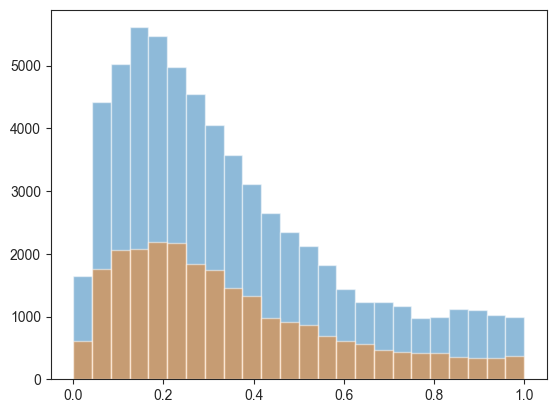

In [78]:
plt.hist(df_weekdays['NH3'], bins=24, alpha=0.5)
plt.hist(df_weekends['NH3'], bins=24, alpha=0.5)
plt.plot()

In [73]:
df_weekdays["weekday"].describe(),  df_weekends["weekday"].describe()


(count      61773
 unique         5
 top       Monday
 freq       12360
 Name: weekday, dtype: object,
 count      24685
 unique         2
 top       Sunday
 freq       12350
 Name: weekday, dtype: object)